In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prerequisite Requirements

This ipynb file requires the following modules:
- `pip install seaborn` 
- `pip install numpy`
- `pip install matplotlib`
- `pip install plotly_express`


You can check your current version via the following terminal commands: 
- `matplotlib.__version__`,
- `import seaborn as sns
- sns.__version__`.
- `import numpy
- numpy.version.version`,

## Initialization

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

YearinBusinessDF = pd.read_csv('csv\ABSCS2018.AB1800CSA02-2023-04-20T164944.csv')
ReceiptSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA03-2023-04-20T164951.csv')
EmploymentSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA04-2023-04-20T164954.csv')

## Extraction

In [36]:
year = 2019
url2019 = f'https://api.census.gov/data/{year}/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'
url2018 = f'https://api.census.gov/data/{year - 1}/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'

response2019 = requests.get(url2019)
response2018 = requests.get(url2018)

In [37]:
data2019 = response2019.json()
data2018 = response2018.json()

col2019 = data2019[0]
col2018 = data2018[0]

df2019 = pd.DataFrame(data2019[1:], columns=col2019)
df2018 = pd.DataFrame(data2018[1:], columns=col2018)

colToDrop = ['GEO_ID', 'NAME', f'NAICS2017', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'PAYANN_F',
 'FIRMPDEMP_S', 'FIRMPDEMP_S_F', 'RCPPDEMP_S', 'RCPPDEMP_S_F', 'EMP_S', 'EMP_S_F', 'PAYANN_S',
 'PAYANN_S_F', 'us', 'YEAR', 'FIRMPDEMP_F', 'RCPPDEMP_F', 'EMP_F', 'VET_GROUP', 'EMPSZFI']

colsToRename2019 = {'FIRMPDEMP': 'FIRMPDEMP2019', 'RCPPDEMP': 'RCPPDEMP2019', 'EMP': 'EMP2019', 'PAYANN': 'PAYANN2019'}
colsToRename2018 = {'FIRMPDEMP': 'FIRMPDEMP2018', 'RCPPDEMP': 'RCPPDEMP2018', 'EMP': 'EMP2018', 'PAYANN': 'PAYANN2018'}

df2019 = df2019.rename(colsToRename2019, axis=1)
df2018 = df2018.rename(colsToRename2018, axis=1)

df2019 = df2019.drop(columns= colToDrop, axis = 1).convert_dtypes().drop_duplicates()
df2018 = df2018.drop(columns= colToDrop, axis = 1).convert_dtypes().drop_duplicates()

mergedYearTables = pd.merge(left = df2019, 
                            right = df2018,
                            how = 'outer')

mergedYearTables = mergedYearTables.loc[mergedYearTables['EMPSZFI_LABEL'] != 'All firms']
mergedYearTables = mergedYearTables.loc[mergedYearTables['EMPSZFI_LABEL'] != 'Firms with less than 500 employees']

mergedYearTables['EMPSZFI_LABEL'] = mergedYearTables['EMPSZFI_LABEL'].replace({
    'Firms with 1 to 4 employees': '1 to 4', 
    'Firms with 10 to 19 employees': '10 to 19', 
    'Firms with 100 to 249 employees': '100 to 249',
    'Firms with 20 to 49 employees' : '20 to 49',
    'Firms with 250 to 499 employees' : '250 to 499',
    'Firms with 5 to 9 employees' : '5 to 9',
    'Firms with 50 to 99 employees' : '50 to 99',
    'Firms with 500 employees or more' : '500+',
    'Firms with no employees' : 'None'
})

mergedYearTables.head()

,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI_LABEL,FIRMPDEMP2019,RCPPDEMP2019,EMP2019,PAYANN2019,FIRMPDEMP2018,RCPPDEMP2018,EMP2018,PAYANN2018
1,Total for all sectors,Equally male/female,Total,Total,Total,None,113112,44015421,0,8164129,111623,42845589,0,6452843
2,Total for all sectors,Equally male/female,Total,Total,Total,1 to 4,414362,179974224,852850,30529173,420105,180346207,867877,29935088
3,Total for all sectors,Equally male/female,Total,Total,Total,5 to 9,147765,158247515,977118,33896032,152032,154564193,1005379,33970465
4,Total for all sectors,Equally male/female,Total,Total,Total,10 to 19,92532,175403006,1242201,41956375,96991,186151937,1307637,42917550
5,Total for all sectors,Equally male/female,Total,Total,Total,20 to 49,57405,269205973,1699717,58244690,59370,272466575,1759347,59505590


## Cleaning

In [17]:
ALLcolsTodrop = ['Year (YEAR)',
                 '2017 NAICS code (NAICS2017)',
                 'Relative standard error of employer firms (%) (FIRMPDEMP_S)',
                 'Relative standard error of sales, value of shipments, or revenue of employer firms (%) (RCPPDEMP_S)',
                 'Relative standard error of number of employees (%) (EMP_S)',
                 'Relative standard error of annual payroll (%) (PAYANN_S)']

YearinBusinessDF.drop(ALLcolsTodrop,inplace=True,axis=1)
ReceiptSizeOfFirmDF.drop(ALLcolsTodrop,inplace=True,axis=1)
EmploymentSizeOfFirmDF.drop(ALLcolsTodrop,inplace=True,axis=1)

mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)

mergedTables.fillna(0);

## Visualizations


c:\Users\nrovr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


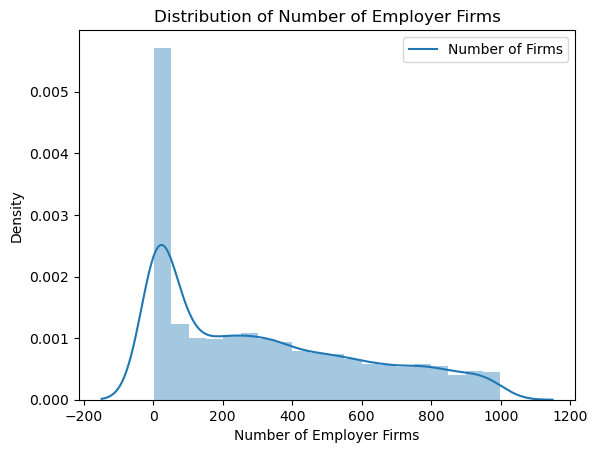

In [18]:
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

sns.distplot(mergedTables['Number of employer firms (FIRMPDEMP)'].dropna())

plt.title('Distribution of Number of Employer Firms')
plt.xlabel('Number of Employer Firms')
plt.ylabel('Density')

plt.legend(['Number of Firms'])

plt.show()

In [19]:
mergedTables['Annual payroll ($1,000) (PAYANN)'] = pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')

fig = px.treemap(mergedTables, path=['Meaning of NAICS code (NAICS2017_LABEL)'], values='Annual payroll ($1,000) (PAYANN)')

fig.update_layout(title='Wealth by Industry')
fig.show()

#Add values to boxes

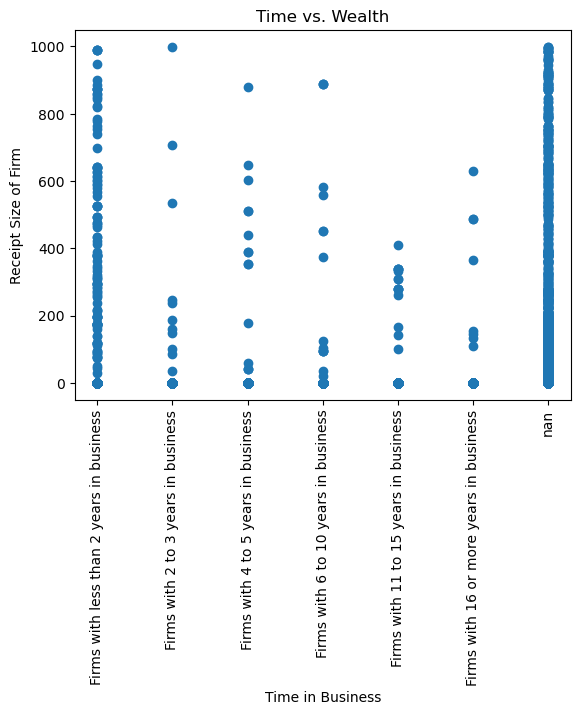

In [20]:
mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'] = mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].astype(str)

data = mergedTables[['Meaning of Years in business code (YIBSZFI_LABEL)', 'Annual payroll ($1,000) (PAYANN)']].fillna((0))

plt.scatter(data['Meaning of Years in business code (YIBSZFI_LABEL)'], data['Annual payroll ($1,000) (PAYANN)'])
plt.xlabel('Time in Business')
plt.ylabel('Receipt Size of Firm')
plt.title('Time vs. Wealth')
plt.xticks(rotation=90)

plt.show()

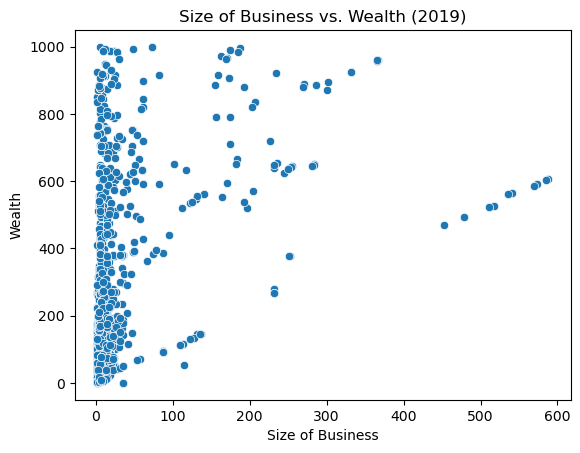

In [21]:
mergedTables['Annual payroll ($1,000) (PAYANN)'] = pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')

sns.scatterplot(x=mergedTables['Number of employer firms (FIRMPDEMP)'], y=mergedTables['Annual payroll ($1,000) (PAYANN)'])

plt.xlabel('Size of Business')
plt.ylabel('Wealth')
plt.title('Size of Business vs. Wealth (2019)')

plt.show()

In [22]:
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)

mergedTables[['Meaning of Race code (RACE_GROUP_LABEL)']].drop_duplicates()
mergedTables = mergedTables.loc[mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'] != 'Total']

renamedRaceDict = {
    'American Indian and Alaska Native': 'Native American ', 
    'Native Hawaiian and Other Pacific Islander': 'Islander', 
    'Equally minority/nonminority': 'Minority',
    'Black or African American': 'African American',
    'Total': 'Unclassifiable'
}

renamedYearsDict = {
    'Firms with less than 2 years in business': '0 to 2', 
    'Firms with 2 to 3 years in business': '2-3', 
    'Firms with 4 to 5 years in business': '4-5',
    'Firms with 6 to 10 years in business' : '6-10',
    'Firms with 11 to 15 years in business' : '11-15',
    'Firms with 16 or more years in business' : '16 plus'
}

mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'] = mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].replace(renamedYearsDict)

mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'] = mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'].replace(renamedRaceDict)

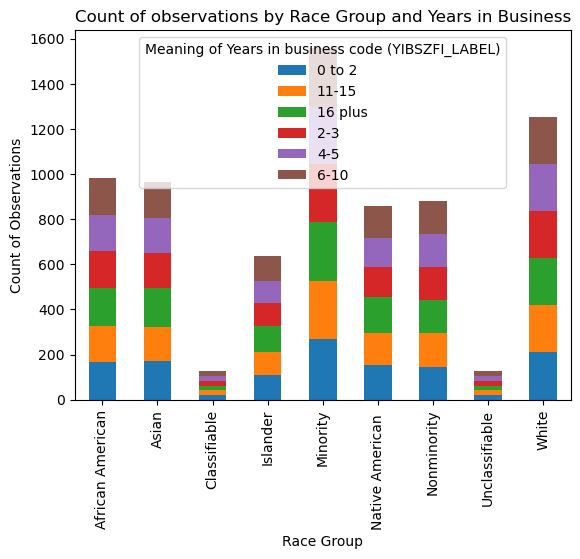

In [23]:
grouped_df = mergedTables.groupby(['Meaning of Race code (RACE_GROUP_LABEL)', 'Meaning of Years in business code (YIBSZFI_LABEL)']).size().reset_index(name='COUNT')

df = grouped_df.pivot(index='Meaning of Race code (RACE_GROUP_LABEL)', columns='Meaning of Years in business code (YIBSZFI_LABEL)', values='COUNT')

df.plot(kind='bar', stacked=True)

plt.title('Count of observations by Race Group and Years in Business')

plt.xlabel('Race Group')
plt.ylabel('Count of Observations')

plt.show()

In [24]:
grouped_df = mergedTables[mergedTables['Meaning of Sex code (SEX_LABEL)'] != 'Total']['Meaning of Sex code (SEX_LABEL)'].value_counts().reset_index(name='Count')
grouped_df.rename(columns={'index': 'Sex'}, inplace=True)

fig = px.treemap(grouped_df, path=['Sex'], values='Count')
fig.update_layout(title='Distribution of Sex in the Survey')

fig.show()

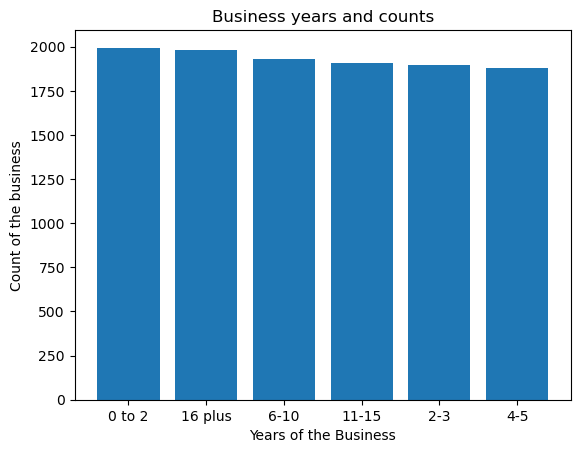

In [25]:
# Plot the data using the filtered DataFrame
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)

mergedTables= mergedTables.loc[:, ['Meaning of Years in business code (YIBSZFI_LABEL)']]
mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'] = mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].replace({
    'Firms with less than 2 years in business': '0 to 2', 
    'Firms with 2 to 3 years in business': '2-3', 
    'Firms with 4 to 5 years in business': '4-5',
    'Firms with 6 to 10 years in business' : '6-10',
    'Firms with 11 to 15 years in business' : '11-15',
    'Firms with 16 or more years in business' : '16 plus',
})

plt.bar(mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].value_counts().index, mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].value_counts().values)

plt.xlabel('Years of the Business')
plt.ylabel('Count of the business')
plt.title('Business years and counts')
plt.show()

In [26]:
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)

# Convert the 'Annual payroll' and 'Number of employer firms' columns to numeric values
mergedTables['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)']= pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

# Sort the data in ascending order by the 'Annual payroll' column
mergedTables_sorted = mergedTables.sort_values('Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)')

fig = go.Figure()

fig.add_trace(go.Box(
    y=mergedTables_sorted['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'],
    name='Business Wealth',
    text=['Business Wealth'],
    marker_color='darkblue',
    boxmean=True # represent mean
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employer firms (FIRMPDEMP)'],
    name='Number of Employer Firms',
    text=['Number of Employer Firms'],
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))
fig.update_layout(
    title="Business wealth and Number of Employer Firms",
    xaxis=dict(title="Variables"),
    yaxis=dict(title="Values")
)

fig.show()

In [27]:
# Convert the 'Annual payroll' and 'Number of employer firms' columns to numeric values
mergedTables['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'] = pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

# Sort the data in ascending order by the 'Annual payroll' column
mergedTables_sorted = mergedTables.sort_values('Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)')

fig = go.Figure()

fig.add_trace(go.Box(
    y=mergedTables_sorted['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'],
    name='Business Wealth',
    text=['Business Wealth'],
    hovertemplate='Business wealth: %{y:$.2f}<extra></extra>',
    marker_color='darkblue',
    boxmean=True # represent mean
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employer firms (FIRMPDEMP)'],
    name='Number of Employer Firms',
    text=['Number of Employer Firms'],
    hovertemplate='Number of Employer Firms: %{y:.0f}<extra></extra>',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employees (EMP)'],
    name='Number of employees',
    text=['Number of employees'],
    hovertemplate='Number of employees: %{y:.0f}<extra></extra>',
    marker_color='pink',
    boxmean='sd' # represent mean and standard deviation
))

fig.update_layout(
    title="Business Wealth and Number of Employer Firms vs Employee",
    xaxis=dict(title="Variables"),
    yaxis=dict(title="Values", range=[0, 7000])
)

fig.show()


In [38]:
mergedYearTables['FIRMPDEMP2019'] = (
    pd.to_numeric(mergedYearTables['FIRMPDEMP2019'],
                  errors='coerce')
      .fillna(0)
    )

mergedYearTables['FIRMPDEMP2018'] = (
    pd.to_numeric(mergedYearTables['FIRMPDEMP2018'],
                  errors='coerce')
      .fillna(0)
    )

analysis_df1 = (
    mergedYearTables
    .groupby(['EMPSZFI_LABEL'], as_index=False)
    .agg({'FIRMPDEMP2019':'sum', 'FIRMPDEMP2018':'sum'})
)

analysis_df1 = analysis_df1.rename({'FIRMPDEMP2019': 'Num of Firms 2019', 'FIRMPDEMP2018': 'Num of Firms 2018'}, axis=1)

analysis_df1

,EMPSZFI_LABEL,Num of Firms 2019,Num of Firms 2018
0,1 to 4,85506213.0,82543555.0
1,10 to 19,18049108.0,17524535.0
2,100 to 249,1733633.0,1650201.0
3,20 to 49,11731905.0,11210009.0
4,250 to 499,502169.0,437849.0
5,5 to 9,28771105.0,27562155.0
6,50 to 99,3424944.0,3225951.0
7,500+,469141.0,421001.0
8,None,22183068.0,20951800.0


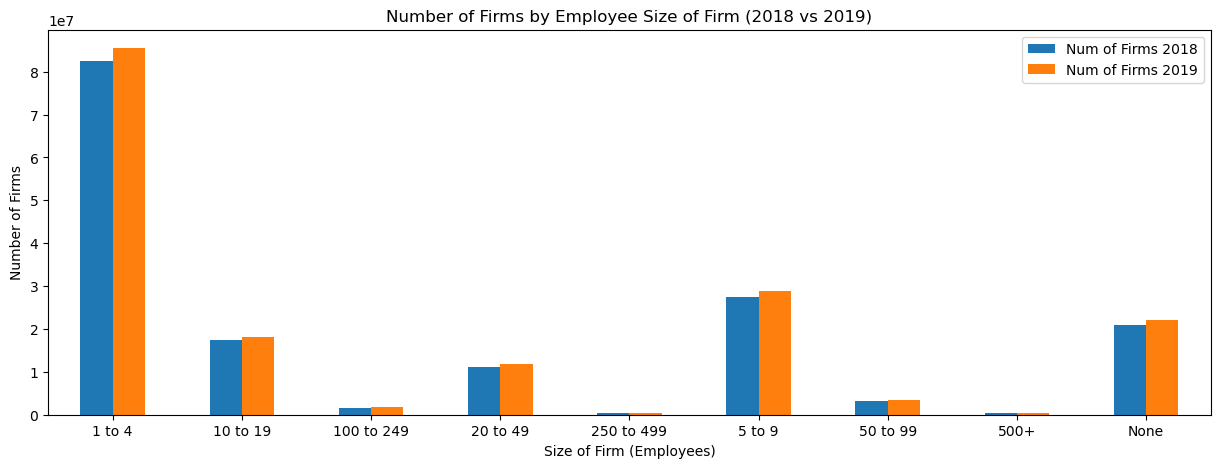

In [39]:

ax = analysis_df1.plot(x="EMPSZFI_LABEL", y=['Num of Firms 2018', 'Num of Firms 2019'], kind="bar", rot=0, figsize=(15, 5))
ax.set_title("Number of Firms by Employee Size of Firm (2018 vs 2019)")
ax.set_xlabel("Size of Firm (Employees)")
ax.set_ylabel("Number of Firms");

In [30]:
mergedYearTables['RCPPDEMP2019'] = (
    pd.to_numeric(mergedYearTables['RCPPDEMP2019'],
                  errors='coerce')
      .fillna(0)
    )

mergedYearTables['RCPPDEMP2018'] = (
    pd.to_numeric(mergedYearTables['RCPPDEMP2018'],
                  errors='coerce')
      .fillna(0)
    )

analysis_df2 = (
    mergedYearTables
    .groupby(['EMPSZFI_LABEL'], as_index=False)
    .agg({'RCPPDEMP2019':'sum', 'RCPPDEMP2018':'sum'})
)

analysis_df2 = analysis_df2.rename({'RCPPDEMP2019': 'Revenue 2019', 'RCPPDEMP2018': 'Revenue 2018'}, axis=1)

analysis_df2

,EMPSZFI_LABEL,Revenue 2019,Revenue 2018
0,1 to 4,1.867006e+10,1.831912e+10
1,10 to 19,2.072570e+10,2.006001e+10
2,100 to 249,3.653792e+10,3.497224e+10
3,20 to 49,3.362192e+10,3.336148e+10
4,250 to 499,2.404931e+10,2.067663e+10
5,5 to 9,1.668449e+10,1.555824e+10
6,50 to 99,2.872882e+10,2.810948e+10
7,500+,9.193916e+10,8.637501e+10
8,None,4.384442e+09,4.582624e+09


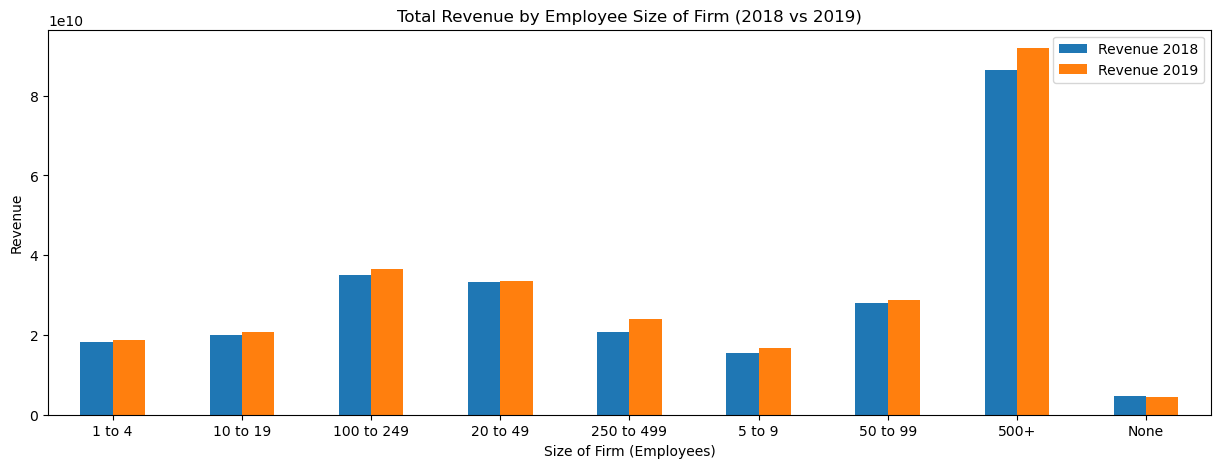

In [31]:
ax = analysis_df2.plot(x="EMPSZFI_LABEL", y=['Revenue 2018', 'Revenue 2019'], kind="bar", rot=0, figsize=(15, 5))
ax.set_title("Total Revenue by Employee Size of Firm (2018 vs 2019)")
ax.set_xlabel("Size of Firm (Employees)")
ax.set_ylabel("Revenue");

In [32]:

mergedYearTables['EMP2019'] = (
    pd.to_numeric(mergedYearTables['EMP2019'],
                  errors='coerce')
      .fillna(0)
    )

mergedYearTables['EMP2018'] = (
    pd.to_numeric(mergedYearTables['EMP2018'],
                  errors='coerce')
      .fillna(0)
    )

analysis_df3 = (
    mergedYearTables
    .groupby(['EMPSZFI_LABEL'], as_index=False)
    .agg({'EMP2019':'sum', 'EMP2018':'sum'})
)

analysis_df3 = analysis_df3.rename({'EMP2019': 'Num of Employees 2019', 'EMP2018': 'Num of Employees 2018'}, axis=1)

analysis_df3

,EMPSZFI_LABEL,Num of Employees 2019,Num of Employees 2018
0,1 to 4,170161636.0,164522561.0
1,10 to 19,242457034.0,235199309.0
2,100 to 249,246198533.0,232325186.0
3,20 to 49,349419839.0,335223274.0
4,250 to 499,145969540.0,136879891.0
5,5 to 9,189557145.0,181797652.0
6,50 to 99,228747241.0,215839931.0
7,500+,684586200.0,618196232.0
8,None,0.0,0.0


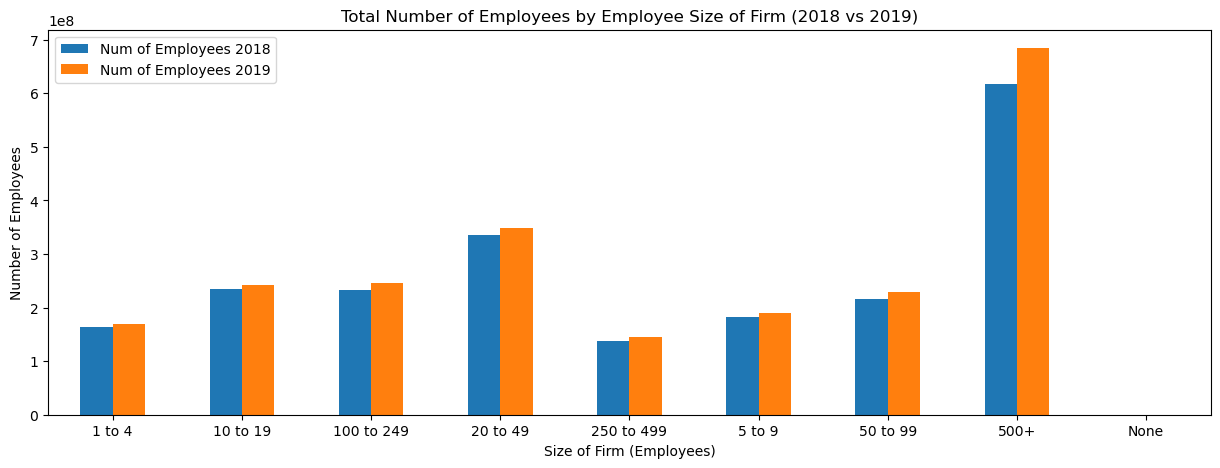

In [33]:

ax = analysis_df3.plot(x="EMPSZFI_LABEL", y=['Num of Employees 2018', 'Num of Employees 2019'], kind="bar", rot=0, figsize=(15, 5))
ax.set_title("Total Number of Employees by Employee Size of Firm (2018 vs 2019)")
ax.set_xlabel("Size of Firm (Employees)")
ax.set_ylabel("Number of Employees");

In [34]:

mergedYearTables['PAYANN2019'] = (
    pd.to_numeric(mergedYearTables['PAYANN2019'],
                  errors='coerce')
      .fillna(0)
    )

mergedYearTables['PAYANN2018'] = (
    pd.to_numeric(mergedYearTables['PAYANN2018'],
                  errors='coerce')
      .fillna(0)
    )

analysis_df4 = (
    mergedYearTables
    .groupby(['EMPSZFI_LABEL'], as_index=False)
    .agg({'PAYANN2019':'sum', 'PAYANN2018':'sum'})
)

analysis_df4 = analysis_df4.rename({'PAYANN2019': 'Annual Payroll 2019', 'PAYANN2018': 'Annual Payroll 2018'}, axis=1)

analysis_df4

,EMPSZFI_LABEL,Annual Payroll 2019,Annual Payroll 2018
0,1 to 4,7.033139e+09,6.604803e+09
1,10 to 19,1.019737e+10,9.514626e+09
2,100 to 249,1.305671e+10,1.149815e+10
3,20 to 49,1.522761e+10,1.428620e+10
4,250 to 499,7.736558e+09,6.579053e+09
5,5 to 9,7.679364e+09,7.224339e+09
6,50 to 99,1.087016e+10,9.935380e+09
7,500+,3.639365e+10,3.159109e+10
8,None,1.507793e+09,1.425936e+09


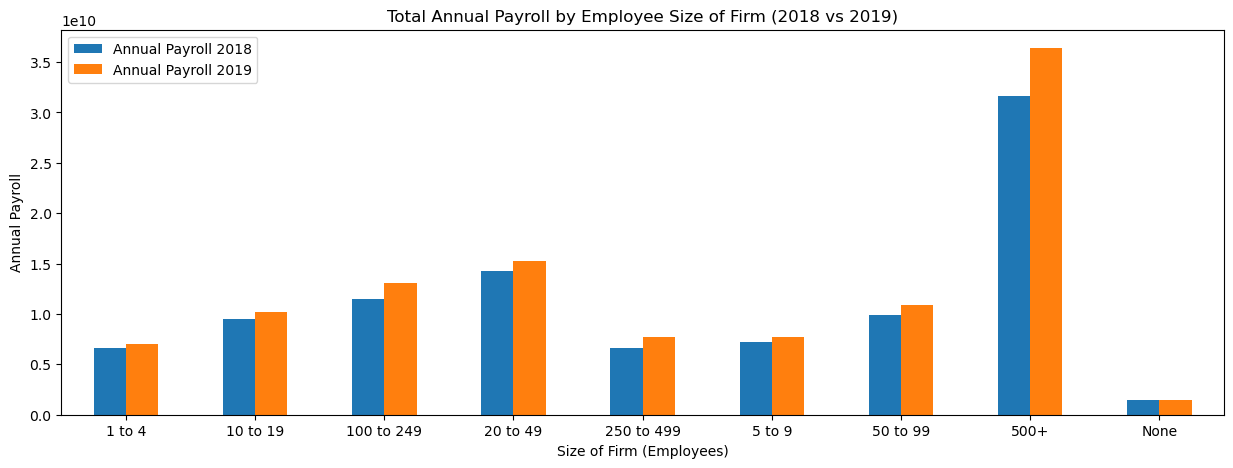

In [35]:
ax = analysis_df4.plot(x="EMPSZFI_LABEL", y=['Annual Payroll 2018', 'Annual Payroll 2019'], kind="bar", rot=0, figsize=(15, 5))
ax.set_title("Total Annual Payroll by Employee Size of Firm (2018 vs 2019)")
ax.set_xlabel("Size of Firm (Employees)")
ax.set_ylabel("Annual Payroll");